In [35]:
import pandas as pd
import numpy as ap
import seaborn as sns   # Why sns?  It's a reference to The West Wing
import matplotlib.pyplot as plt  # seaborn is based on matplotlib
sns.set(color_codes=True) # adds a nice background to the graphs
%matplotlib inline
from scipy import stats

In [36]:
mydata=pd.read_csv("D:\Survey.csv")

In [37]:
mydata

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,58,Female,21,Senior,International Business,No,2.4,Part-Time,40.0,1,3,1000,Laptop,10
58,59,Female,20,Junior,CIS,No,2.9,Part-Time,40.0,2,4,350,Laptop,250
59,60,Female,20,Sophomore,CIS,No,2.5,Part-Time,55.0,1,4,500,Laptop,500
60,61,Female,23,Senior,Accounting,Yes,3.5,Part-Time,30.0,2,3,490,Laptop,50


## 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

## 2.1.1. Gender and Major

In [76]:
pd.crosstab(mydata['Gender'],mydata['Major'])

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


## 2.1.2. Gender and Grad Intention

In [19]:
pd.crosstab(mydata['Gender'],mydata['Grad Intention'])

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


## 2.1.3. Gender and Employment

In [20]:
pd.crosstab(mydata['Gender'],mydata['Employment'])

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


## 2.1.4. Gender and Computer

In [21]:
pd.crosstab(mydata['Gender'],mydata['Computer'])

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


In [22]:
mydata['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

## 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [23]:
print(("probability that a randomly selected CMSU student will be male is:",29/len(mydata['Gender'])))

('probability that a randomly selected CMSU student will be male is:', 0.46774193548387094)


## 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [24]:
print("probability that a randomly selected CMSU student will be female",33/len(mydata['Gender']))

probability that a randomly selected CMSU student will be female 0.532258064516129


## 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [79]:
df=pd.crosstab(mydata['Gender'],mydata['Major'],margins=True,normalize='index')
df

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,0.090909,0.090909,0.212121,0.121212,0.121212,0.090909,0.272727,0.000000
Male,0.137931,0.034483,0.137931,0.068966,0.206897,0.137931,0.172414,0.103448
All,0.112903,0.064516,0.177419,0.096774,0.161290,0.112903,0.225806,0.048387


In [46]:
df['(Accounting+CIS+Economics/Finance+International Business+Management+Other+Retailing/Marketing+Undecided)']=df.sum(axis=1)
df['(Accounting+CIS+Economics/Finance+International Business+Management+Other+Retailing/Marketing+Undecided)']

Gender
Female    33
Male      29
Name: (Accounting+CIS+Economics/Finance+International Business+Management+Other+Retailing/Marketing+Undecided), dtype: int64

## 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

## 2.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [47]:
df1=df['(Female)']=df.sum().T
df1

Major
Accounting                                                                                                   7
CIS                                                                                                          4
Economics/Finance                                                                                           11
International Business                                                                                       6
Management                                                                                                  10
Other                                                                                                        7
Retailing/Marketing                                                                                         14
Undecided                                                                                                    3
(Accounting+CIS+Economics/Finance+International Business+Management+Other+Retailing/Marketing+Undecided)  

In [77]:
print('conditional probability of different majors among the male students in Accounting is',4/29)
print('conditional probability of different majors among the male students in CIS is',1/29)
print('conditional probability of different majors among the male students in Economics/Finance  is',4/29)
print('conditional probability of different majors among the male students in International Business  is',2/29*100)
print('conditional probability of different majors among the male students in Management is',6/29)
print('conditional probability of different majors among the male students in Other is',4/29)
print('conditional probability of different majors among the male students in Retailing/Marketing is',14/29)
print('conditional probability of different majors among the male students in Undecided  is',3/29)

conditional probability of different majors among the male students in Accounting is 0.13793103448275862
conditional probability of different majors among the male students in CIS is 0.034482758620689655
conditional probability of different majors among the male students in Economics/Finance  is 0.13793103448275862
conditional probability of different majors among the male students in International Business  is 6.896551724137931
conditional probability of different majors among the male students in Management is 0.20689655172413793
conditional probability of different majors among the male students in Other is 0.13793103448275862
conditional probability of different majors among the male students in Retailing/Marketing is 0.4827586206896552
conditional probability of different majors among the male students in Undecided  is 0.10344827586206896


In [78]:
print('conditional probability of different majors among the female students in Accounting is',3/33*100)
print('conditional probability of different majors among the female students in CIS is',3/33*100)
print('conditional probability of different majors among the female students in Economics/Finance  is',7/33*100)
print('conditional probability of different majors among the female students in International Business  is',4/33*100)
print('conditional probability of different majors among the female students in Management is',4/33*100)
print('conditional probability of different majors among the female students in Other is',3/33*100)
print('conditional probability of different majors among the female students in Retailing/Marketing is',9/33*100)
print('conditional probability of different majors among the female students in Undecided  is',0/33*100)

conditional probability of different majors among the female students in Accounting is 9.090909090909092
conditional probability of different majors among the female students in CIS is 9.090909090909092
conditional probability of different majors among the female students in Economics/Finance  is 21.21212121212121
conditional probability of different majors among the female students in International Business  is 12.121212121212121
conditional probability of different majors among the female students in Management is 12.121212121212121
conditional probability of different majors among the female students in Other is 9.090909090909092
conditional probability of different majors among the female students in Retailing/Marketing is 27.27272727272727
conditional probability of different majors among the female students in Undecided  is 0.0


## Find the probability That a randomly chosen student is a male and intends to graduate.

In [49]:
print('probability That a randomly chosen student is a male and intends to graduate.',17/29)

probability That a randomly chosen student is a male and intends to graduate. 0.5862068965517241


## Find the probability that a randomly selected student is a female and does NOT have a laptop

In [50]:
print('probability that a randomly selected student is a female and does NOT have a laptop',4/33)

probability that a randomly selected student is a female and does NOT have a laptop 0.12121212121212122


## Find the probability that a randomly chosen student is a male or has a full-time employment

In [83]:
fulltime_emp = (mydata['Employment'] =='Full-Time').sum()
fulltime_emp

10

In [82]:

male_fulltime_emp = ((mydata['Employment'] =='Full-Time') & (mydata['Gender'] =='Male')).sum()
male_fulltime_emp

7

In [88]:
print('The probability that a randomly selected CMSU student will be male',46.77+16.13-11.29)

The probability that a randomly selected CMSU student will be male 51.61000000000001


## Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [92]:
print('conditional probability that given a female student is randomly chosen, she is majoring in international business or management.',/62*100)

conditional probability that given a female student is randomly chosen, she is majoring in international business or management. 24.193548387096776


##  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?

In [64]:
df2=pd.crosstab(mydata['Gender'],mydata['Grad Intention'])
df2

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [66]:
contengency_table=df2.drop('Undecided',axis=1)

In [67]:
contengency_table

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


In [68]:
11/40==20/40*20/40

False

graduate intention and being female are are not independent events

## If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [98]:
gpa_less=(mydata['GPA']<3).sum()
gpa_less

17

In [99]:
total_count=62
total_count

62

In [100]:
print("total probality of his her cgpa is less then 2is:",gpa_less/total_count*100)

total probality of his her cgpa is less then 2is: 27.419354838709676


## 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more

In [106]:
earning=((mydata["Gender"]=="Male") & (mydata["Salary"]>=50)).sum()
earning

14

In [107]:
pd.crosstab((mydata['Gender']=='Male'), (mydata['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759


In [108]:
pd.crosstab((mydata['Gender']=='Female'), (mydata['Salary'] >= 50), normalize='index')

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455


## 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skew value of GPA is -0.3146000894506981
skew value of Salary is 0.5347008436225946


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


skew value of Spending is 1.5859147414045331
skew value of Text Message is 1.2958079731054333


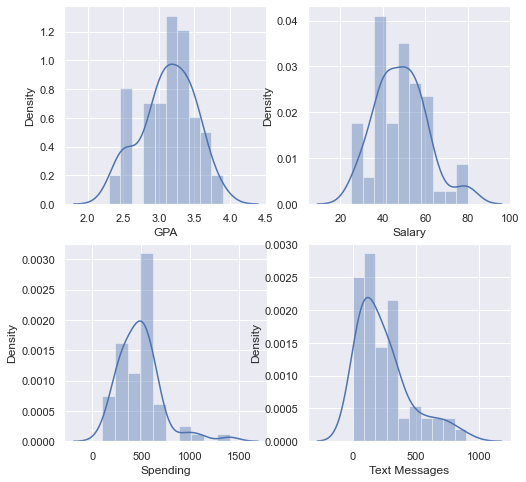

In [112]:
plt.figure(figsize=[8, 8])

plt.subplot(2, 2, 1)
sns.distplot(mydata['GPA'], bins = 10, kde=True, rug= False);
print('skew value of GPA is', mydata['GPA'].skew())

plt.subplot(2, 2, 2)
sns.distplot(mydata['Salary'], bins = 10, kde=True, rug= False);
print('skew value of Salary is', mydata['Salary'].skew())


plt.subplot(2, 2, 3)
sns.distplot(mydata['Spending'], bins = 10, kde=True, rug= False);
print('skew value of Spending is', mydata['Spending'].skew())


plt.subplot(2, 2, 4)
sns.distplot(mydata['Text Messages'], bins = 10, kde=True, rug= False);
print('skew value of Text Message is', mydata['Text Messages'].skew())

plt.show()

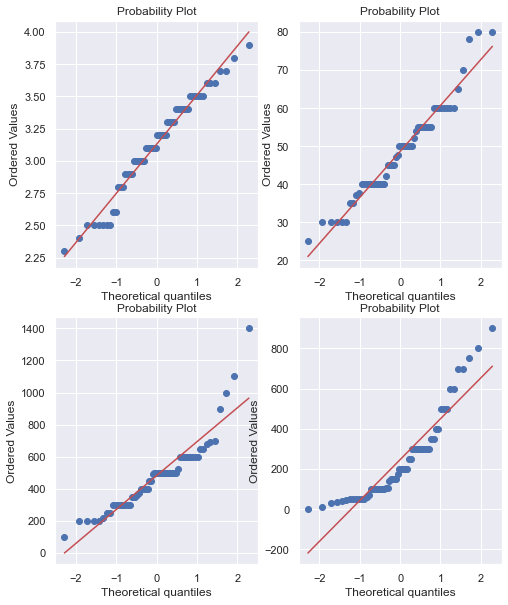

In [113]:
plt.figure(figsize=[8, 10])

plt.subplot(2, 2, 1)
stats.probplot(mydata['GPA'], plot=plt);

plt.subplot(2, 2, 2)
stats.probplot(mydata['Salary'], plot=plt);


plt.subplot(2, 2, 3)
stats.probplot(mydata['Spending'], plot=plt);


plt.subplot(2, 2, 4)
stats.probplot(mydata['Text Messages'], plot=plt);

plt.show()